# 라이브러리

In [1]:
from google.colab import drive
import os
import json
from tqdm import tqdm
import shutil
import re
from glob import glob
from google.colab import files

In [2]:
import yaml
import torch
from IPython.display import Image, clear_output

# 데이터셋 다운로드

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/framework
!pwd

/content/drive/MyDrive/framework
/content/drive/MyDrive/framework


In [6]:
#yolov5 모델 다운로드
#!git clone https://github.com/ultralytics/yolov5.git

In [7]:
%cd yolov5
# !pip install -r requirements.txt

/content/drive/MyDrive/framework/yolov5


# **데이터 셋 준비**


In [ ]:
import cv2
import os

vidcap=cv2.VideoCapture('/content/drive/MyDrive/yongv4.mp4')

cnt=0
os.mkdir('/content/drive/MyDrive/yongv4_dir')

# print(vidcap.get(cv2.CAP_PROP_FPS))

while(vidcap.isOpened()):
  ret, image = vidcap.read()
  if ret == False:
    break

  if(int(vidcap.get(1)) % 30 == 0): # 10프레임마다 1장씩 저장
    print('Save frame number:' + str(int(vidcap.get(1))))
    cv2.imwrite('/content/drive/MyDrive/yongv4_dir/MNOP_%d.jpg'%cnt, image)
    cnt+=1

vidcap.release()
#cv2.destroyAllWindows()

Save frame number:30
Save frame number:60
Save frame number:90
Save frame number:120
Save frame number:150
Save frame number:180
Save frame number:210
Save frame number:240
Save frame number:270
Save frame number:300
Save frame number:330
Save frame number:360
Save frame number:390
Save frame number:420
Save frame number:450
Save frame number:480
Save frame number:510
Save frame number:540
Save frame number:570
Save frame number:600
Save frame number:630
Save frame number:660
Save frame number:690
Save frame number:720
Save frame number:750
Save frame number:780
Save frame number:810
Save frame number:840
Save frame number:870
Save frame number:900
Save frame number:930
Save frame number:960
Save frame number:990
Save frame number:1020
Save frame number:1050
Save frame number:1080
Save frame number:1110
Save frame number:1140
Save frame number:1170
Save frame number:1200
Save frame number:1230
Save frame number:1260
Save frame number:1290
Save frame number:1320
Save frame number:1350
S

In [ ]:
from glob import glob

train_img_lst = glob('/content/drive/MyDrive/framework/images/*.jpg')


with open('/content/drive/MyDrive/framework/train.txt','w') as f:
  f.write('\n'.join(train_img_lst)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/data.yaml

train: /content/drive/MyDrive/framework/images
val: /content/drive/MyDrive/framework/images

nc: 2
names: ['face', 'yong']

In [ ]:
%cat /content/drive/MyDrive/framework/data.yaml


train: /content/drive/MyDrive/framework/images
val: /content/drive/MyDrive/framework/images

nc: 2
names: ['face', 'yong']


In [ ]:
import yaml

with open('/content/drive/MyDrive/framework/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

  print(num_classes)

2


In [ ]:
!cat /content/drive/MyDrive/framework/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%%writetemplate /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# 데이터 학습
!python train.py --img 720 --batch 8 --epochs 200 --data /content/drive/MyDrive/framework/data.yaml --cfg /content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml --weight yolov5s.pt --name yolov5s_YongMyung_Result --cache

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/framework/yolov5/models/custom_yolov5s.yaml, data=/content/drive/MyDrive/framework/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_YongMyung_Result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 30 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup

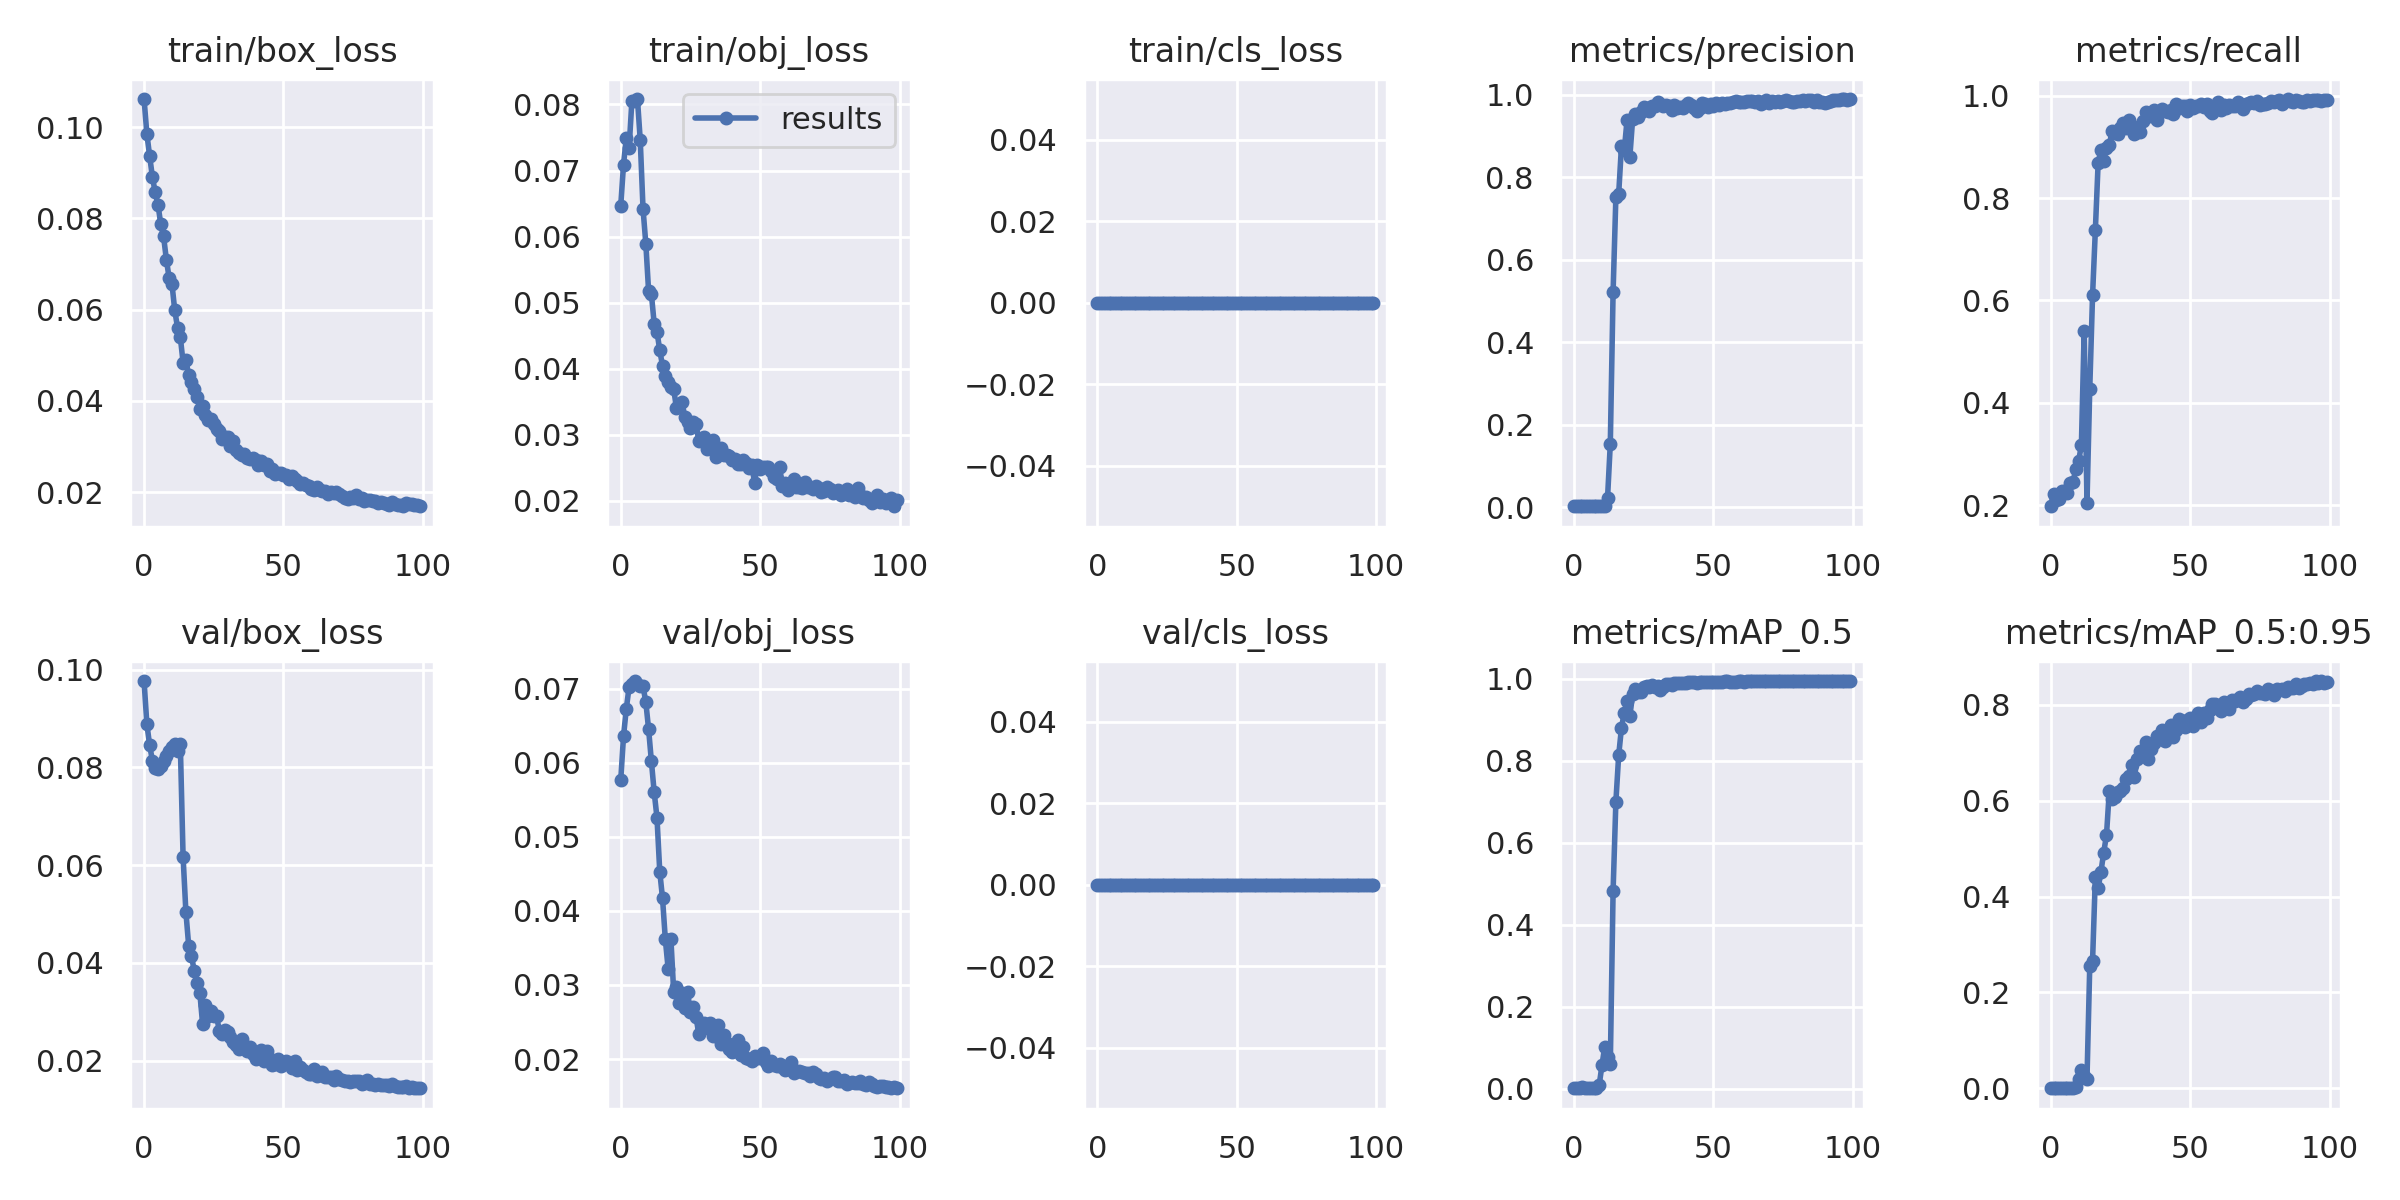

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/test_result6/results.png', width=800)

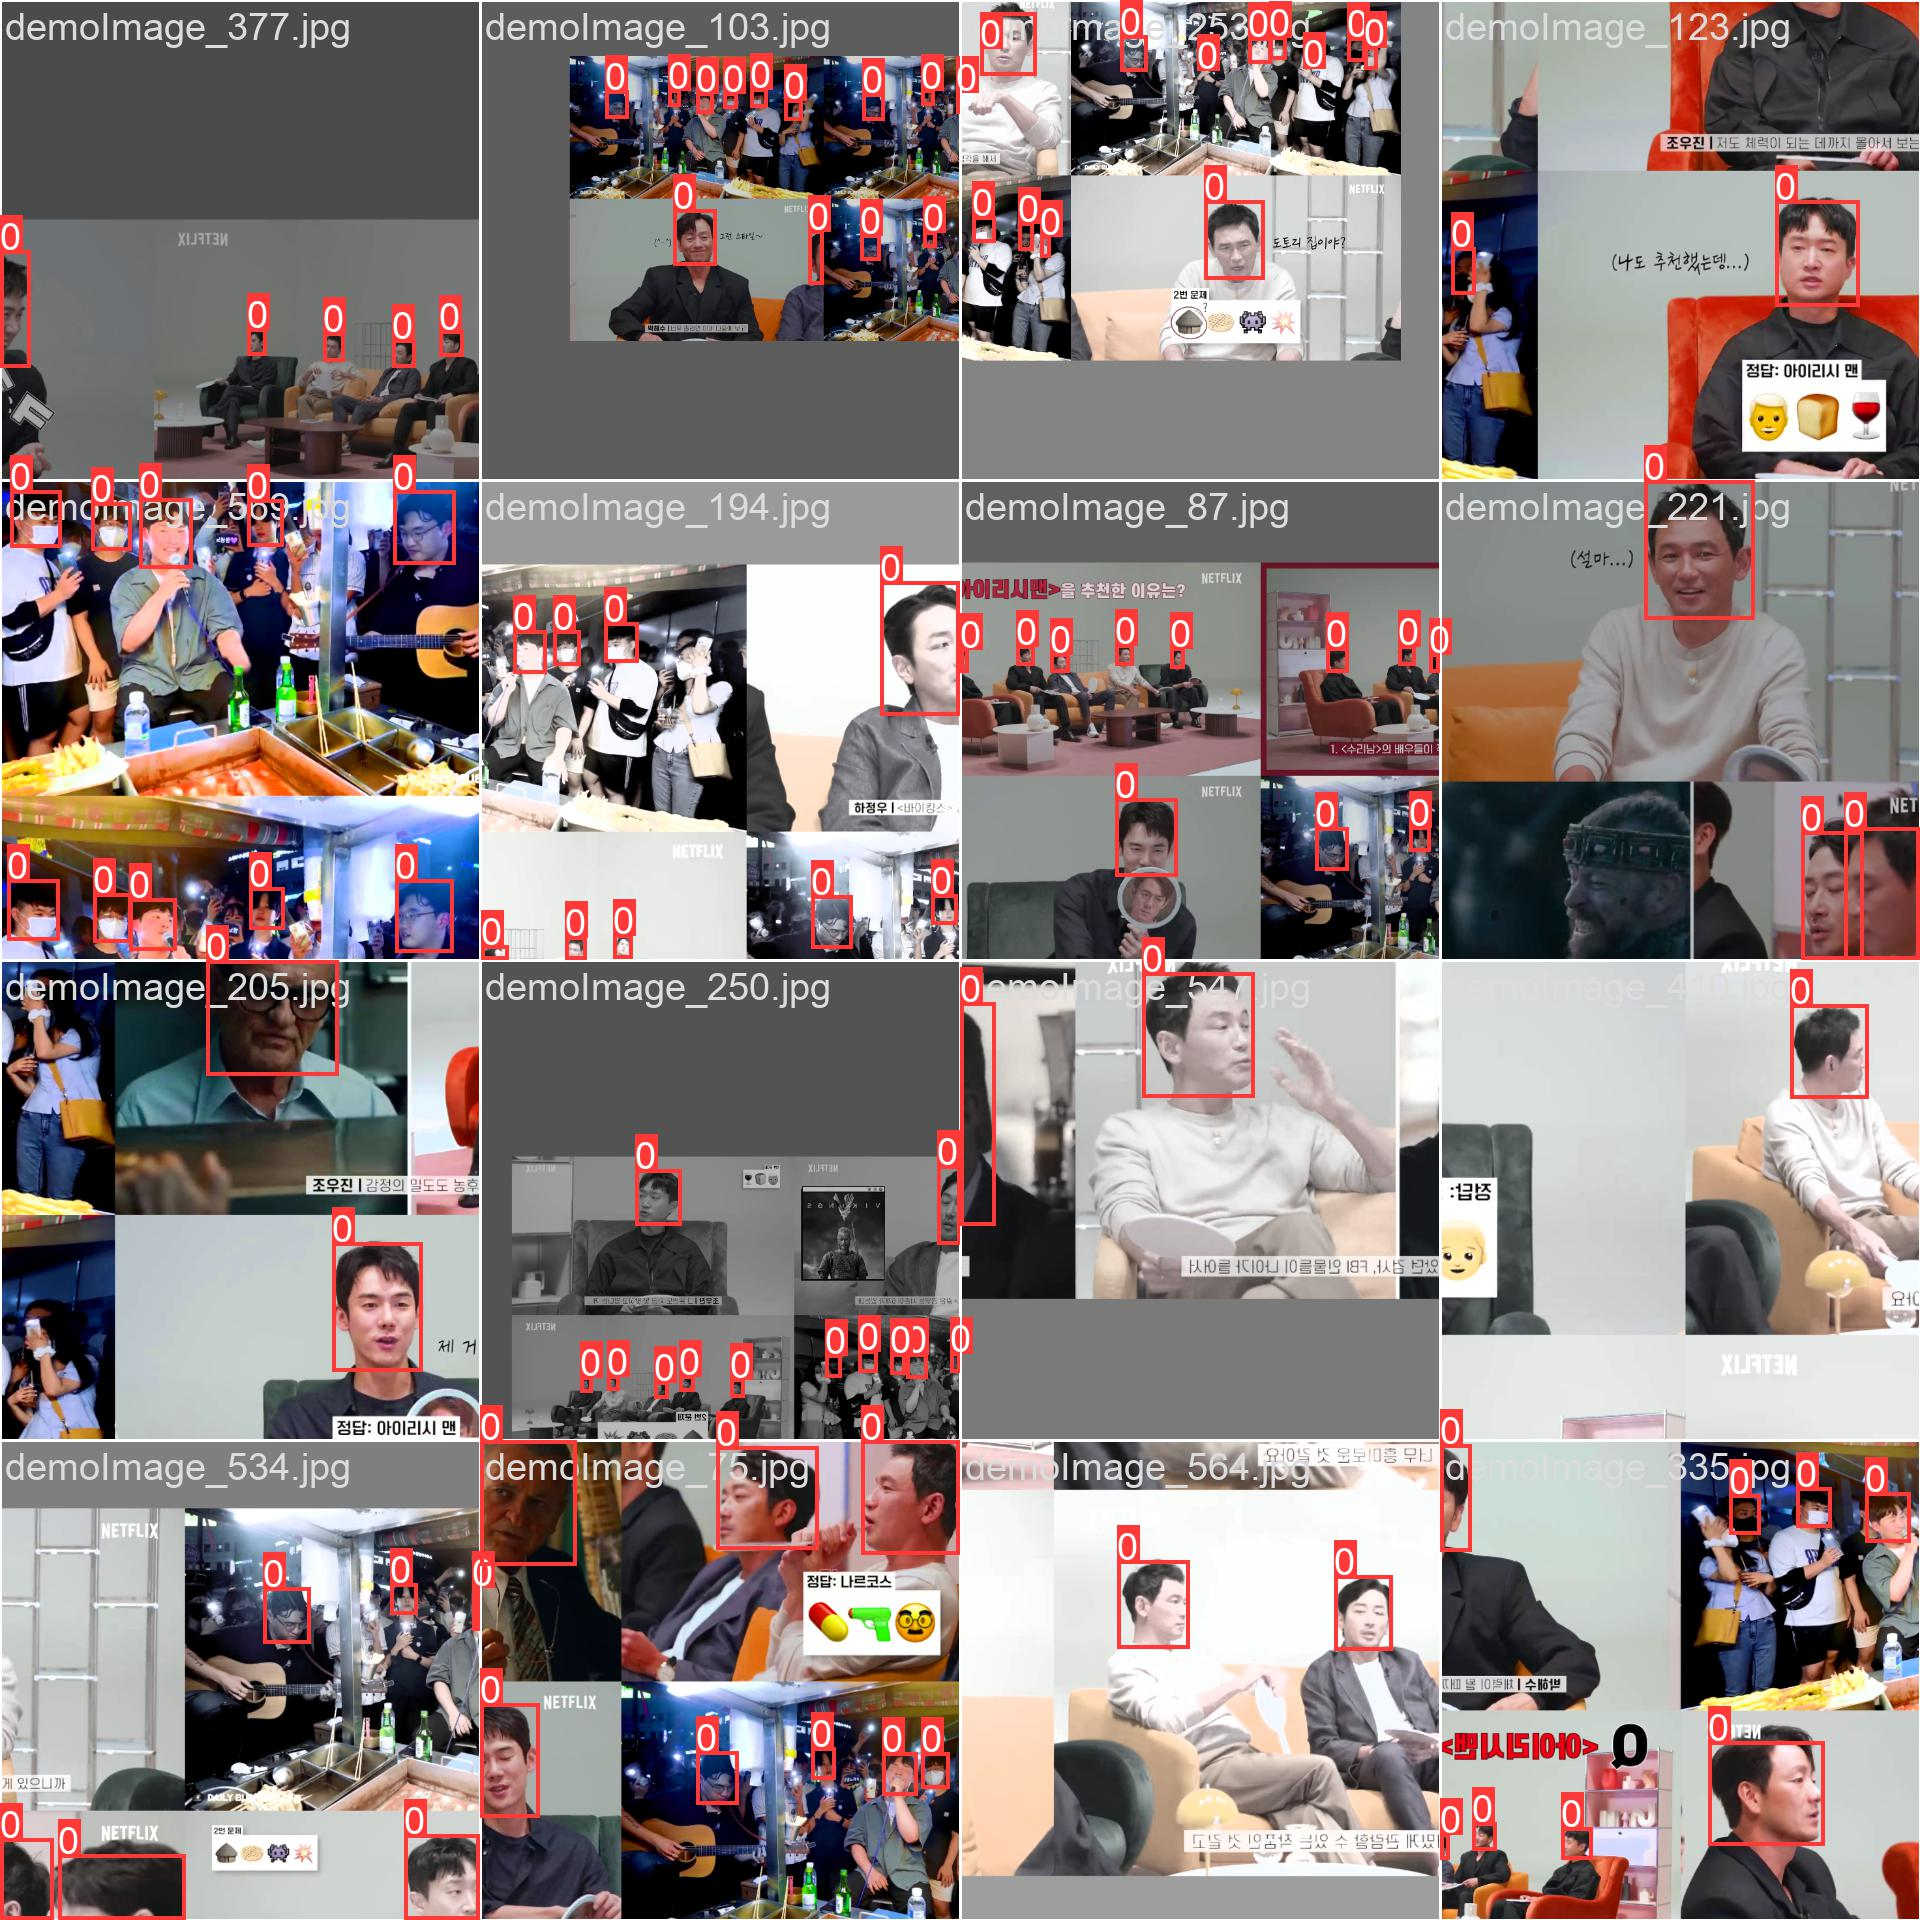

In [ ]:
# 디텍팅 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/test_result6/train_batch0.jpg', width=800)

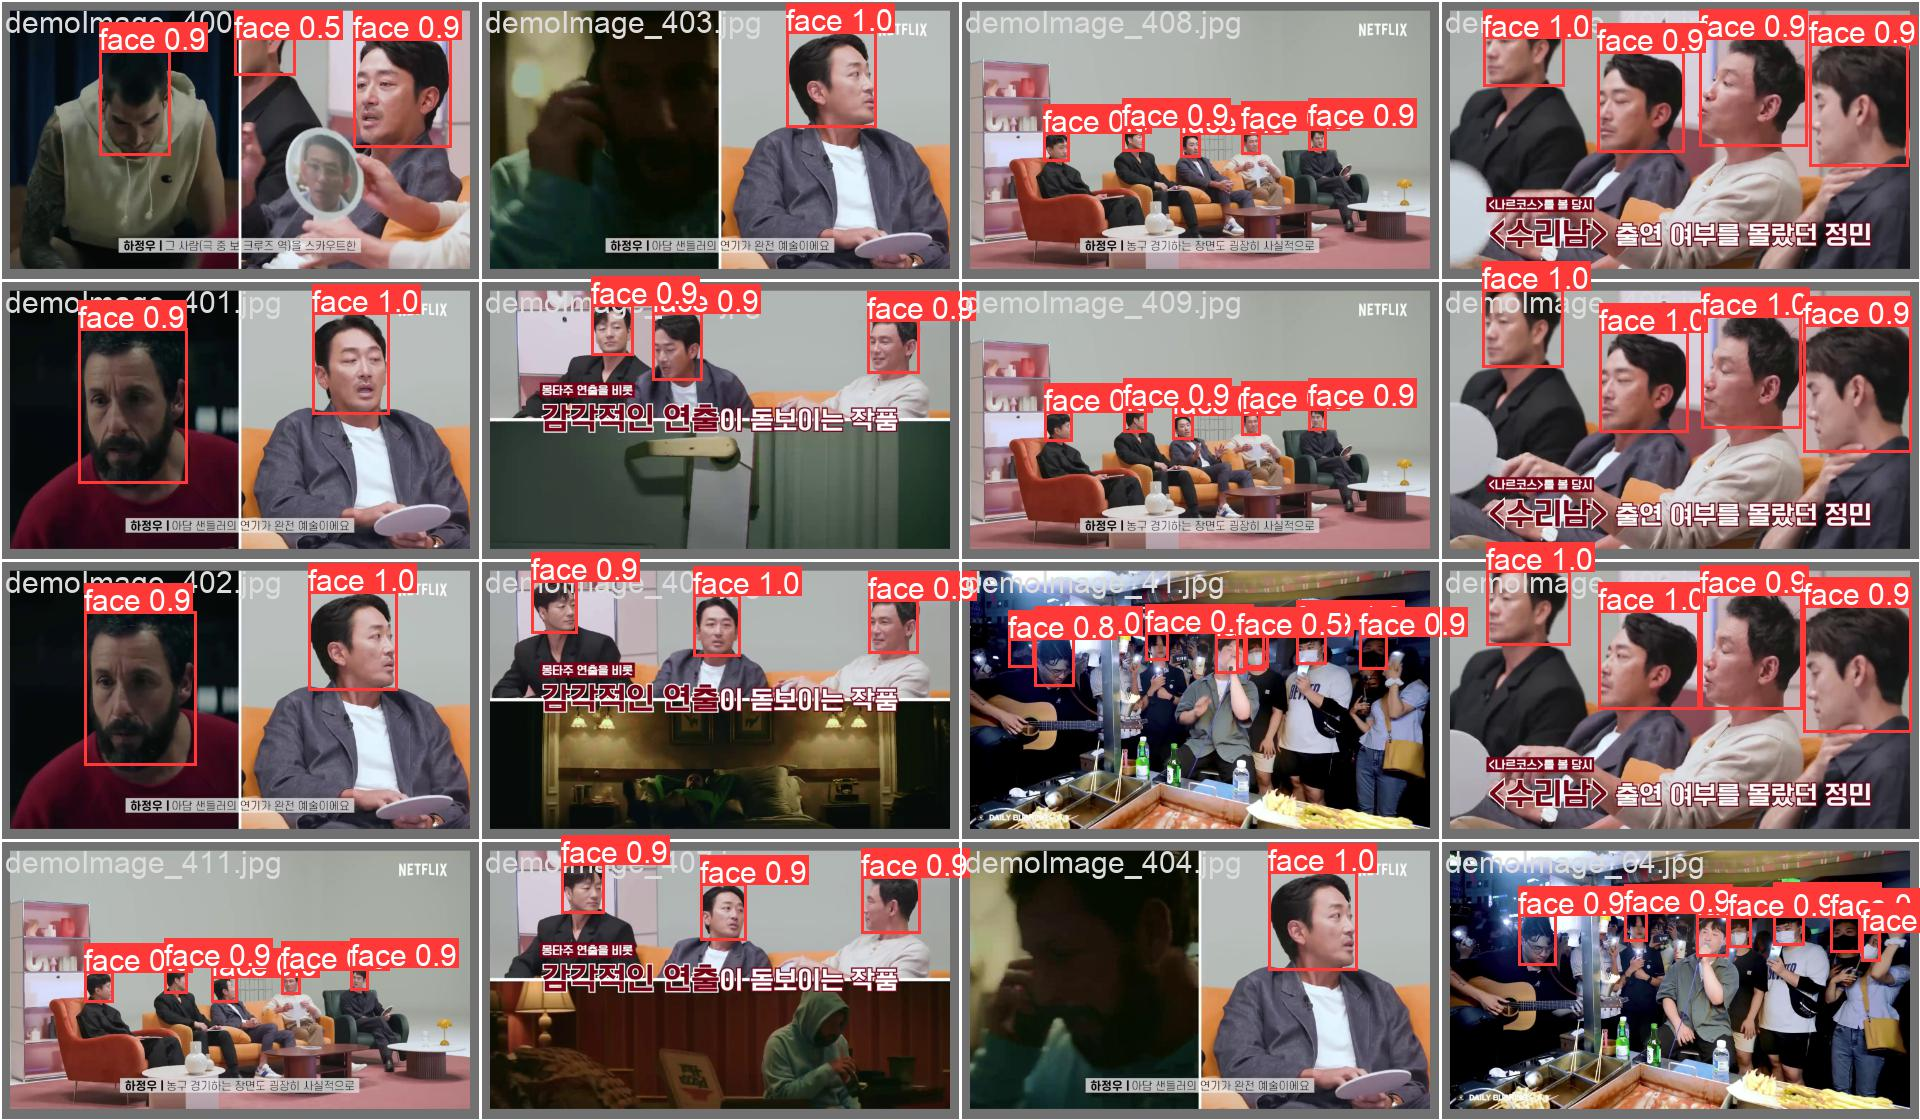

In [ ]:
# 라벨값 확인
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/test_result6/val_batch1_pred.jpg', width=800)

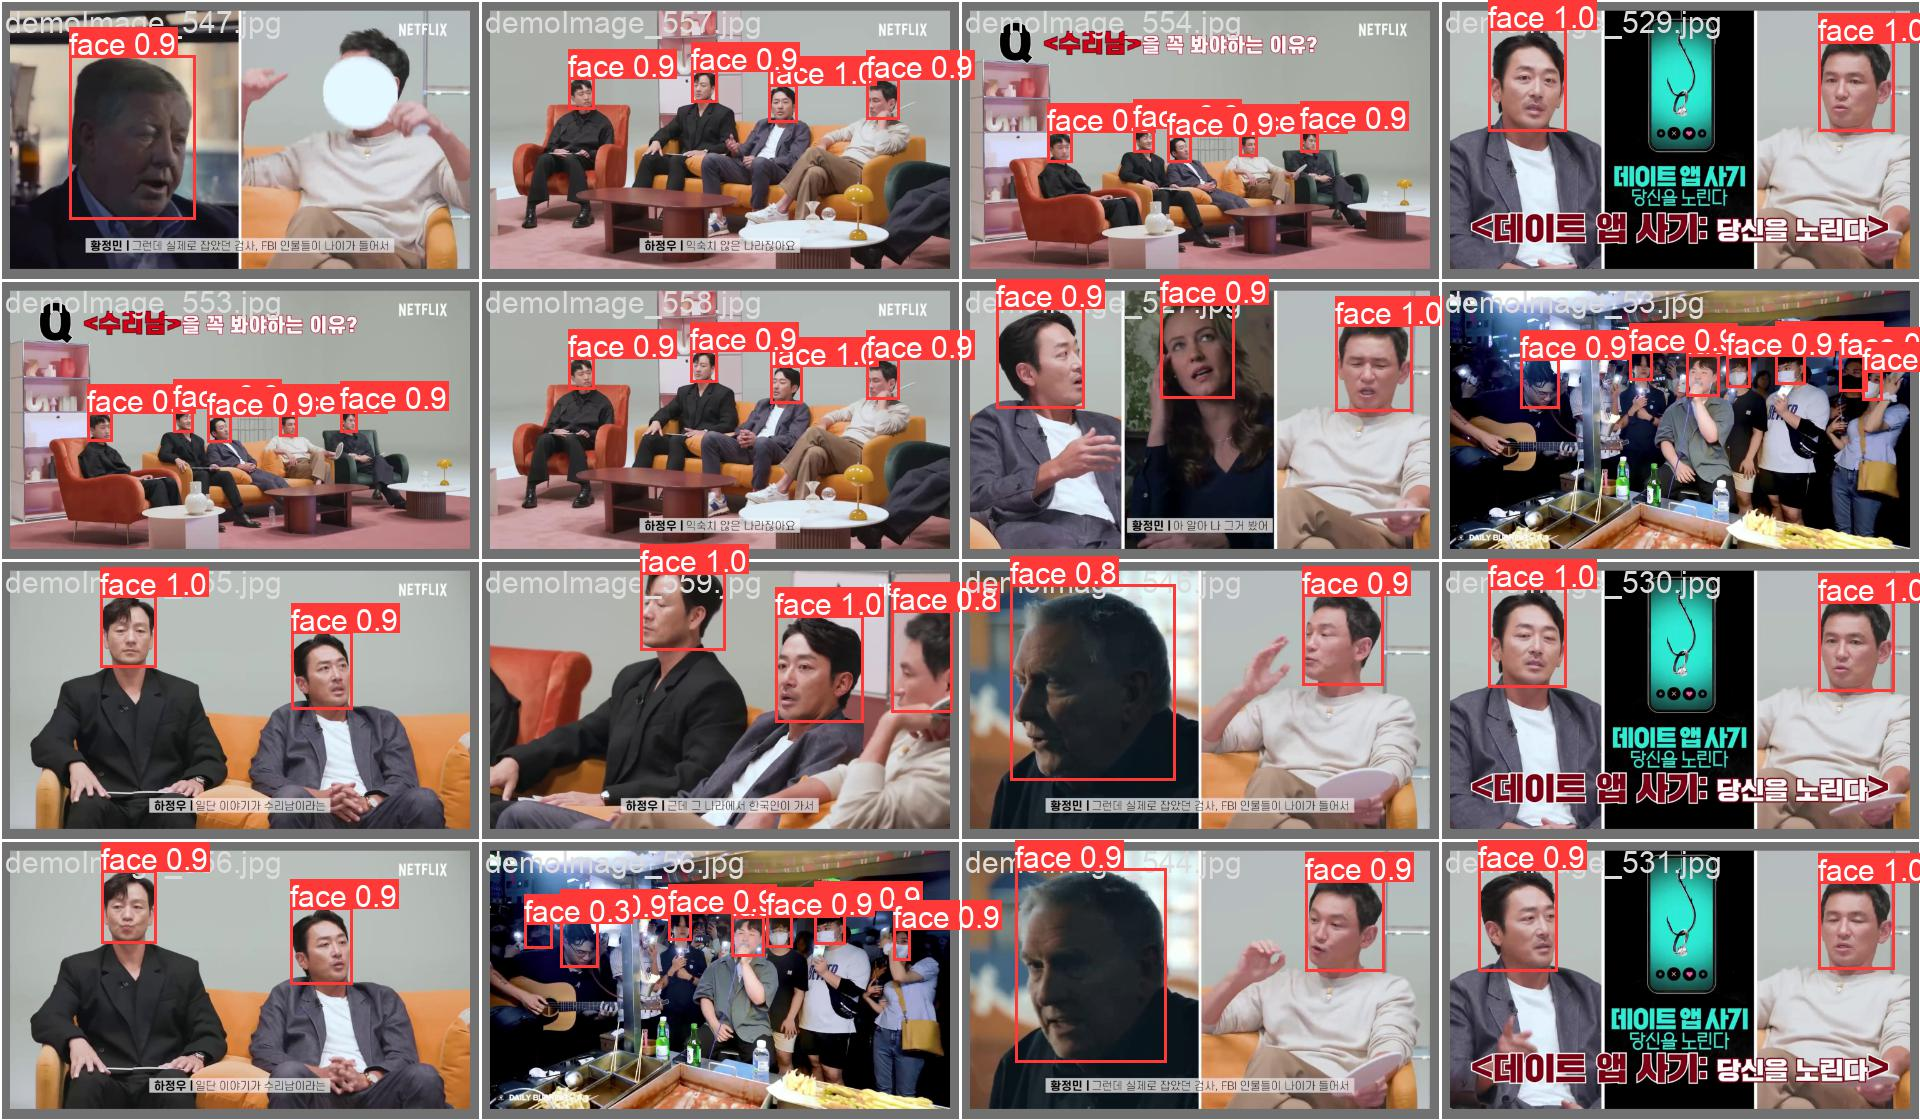

In [ ]:
Image(filename='/content/drive/MyDrive/framework/yolov5/runs/train/test_result6/val_batch2_pred.jpg', width=800)

## 테스트

In [9]:
# 테스트 1
!python detect2.py --source /content/drive/MyDrive/framework/yongmyungssmp4.mp4 --weights /content/drive/MyDrive/framework/yolov5/runs/train/yolov5s_YongMyung_Result3/weights/best.pt

detect2: weights=['/content/drive/MyDrive/framework/yolov5/runs/train/yolov5s_YongMyung_Result3/weights/best.pt'], source=/content/drive/MyDrive/framework/yongmyungssmp4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients
video 1/1 (1/3254) /content/drive/MyDrive/framework/yongmyungssmp4.mp4: 384x640 2 faces, 1 yong, 12.7ms
video 1/1 (2/3254) /content/drive/MyDrive/framework/yongmyungssmp4.mp4: 384x640 1 face, 1 yong, 10.3ms
video 1/1 (3/3254) /content/drive/MyDrive/framew

In [ ]:
# 테스트 2
!python detect2.py --source /content/drive/MyDrive/framework/kymtest.mp4 --weights /content/drive/MyDrive/framework/yolov5/runs/train/yolov5s_YongMyung_Result3/weights/best.pt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (2437/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2438/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2439/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2440/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2441/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2442/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 9.0ms
video 1/1 (2443/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.3ms
video 1/1 (2444/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.0ms
video 1/1 (2445/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 8.1ms
video 1/1 (2446/7434) /content/drive/MyDrive/framework/kymtest.mp4: 384x640 3 faces, 1 yong, 8.0ms
video 1/1 (2447/7434) /content/drive/MyDrive/f